# Project 02 -- Anthony Micco

**TA Help:** N/A

**Collaboration:** N/A

**Internet Resources:** Used Pandas documentation to understand how to slice rows and columns for example in question 1 (https://pandas.pydata.org/docs/user_guide/indexing.html) \
Again used Pandas documentation to figure out how to make sure the plot labels were not rotated (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) \
Watched a video to better understand the difference between convolution and cross correlation (https://www.youtube.com/watch?v=tS-ib_mgGbU) \
Read through this GeeksForGeeks article to better understand max pooling and average pooling (https://www.geeksforgeeks.org/deep-learning/cnn-introduction-to-pooling-layer/) \
Used another GeeksForGeeks article to help in my understanding of fully connected layers and convolutional layers (https://www.geeksforgeeks.org/deep-learning/fully-connected-layer-vs-convolutional-layer/) \
Reviewed a GeekForGeeks article on Epochs to understand why we use them as well as their advantages and disadvantages (https://www.geeksforgeeks.org/machine-learning/epoch-in-machine-learning/) \
Utilized article to assist in my explanation of the forward and backward pass (https://towardsdatascience.com/neural-networks-forward-pass-and-backpropagation-be3b75a1cfcc/) \
Used to understand what the loss.backward() function did (https://discuss.pytorch.org/t/what-does-the-backward-function-do/9944) \
Read to understand what the optimizer.step() function did within the model (https://medium.com/@whyamit404/what-does-optimizer-step-do-in-pytorch-83f0fb0cbfe5)

**ChatGPT, Gemini, Claude, etc:** N/A

**Link to AI Chat History**: None

**OVERALL MESSAGE:** Any time that you used anything except your brain to solve the questions in these projects, you need to disclose such resources at the start of the project, with details about your usage of the tools.

**YOUR OWN WORK:** Even when you utilize other resources, do NOT just copy and paste.  Write all explanations in your own words, using several sentences in English, which are understandable and which you wrote (and did not just copy and paste).

## Question 1

In [28]:
#loading in the MNIST training data
import pandas as pd

data = pd.read_csv('/anvil/projects/tdm/data/mnist/mnist_train.csv')

In [29]:
#printing the head of the dataset
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#printing the shape of the dataset
data.shape

(60000, 785)

In [31]:
#finding the first 30 columns of the first 5 rows
data.iloc[:5, 1:30]

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1a) At first glance, I notice there are a lot of 0's in the dataset. This is obviously because the number in each picture is the only thing in white, so there are a lot more black pixels than lighter colored or white pixels. The vastness of the dataset is also really eyepopping to me because it is not very often that we work with datasets as large as this one with over 750 columns. I also think its really unique how one row of data with 785 total columns containing the numbers 0 to 255 can represent an image. It is a simple image, but it makes me think about how we could do this with more complex images if we were able to calculate the pixel color at certain locations. 
1b) In this dataset, each row represents one complete image with 784 pixels, while each column represents a single pixel of the image where each value in the column represents how light or dark the pixel is based on a value from 0 to 255. For example, the first column, 1x1 represents the pixel in the first column and first row of the image which contains the value 0, meaning it is black. It then increments until it gets to the 1x28 column which is the last column of the first row of the image before the second row of the image starts with column 2x1. This increment repeats until we get to the very last column which is 28x28 with a value of 0 and a complete image.    

## Question 2

In [32]:
#loading in imports
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np

In [33]:
#defining the MNIST data loader class
class MNISTDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # First column of a row idx is the label
        label = self.data.iloc[idx, 0]
        # Get all remainder of the row (columns - pixels) and returns 1D array through .values
        # 8bit unsigned integers allow visual display of grayscale images. It has 0-255 for the 256 different intensity levels
        pixels = self.data.iloc[idx, 1:].values.astype(np.uint8)
        # Convert into 2D array (28x28)
        image = pixels.reshape(28, 28)

        if self.transform:
            image = self.transform(image)

        return image, label

In [34]:
#loading in the test and training data using the class
transform = transforms.Compose([transforms.ToTensor(),   # converts image to tensor [0,1]
                                 transforms.Normalize((0.5,), (0.5,))])  # normalize to [-1,1]

#loading in training data
train_dataset = MNISTDataset('/anvil/projects/tdm/data/mnist/mnist_train.csv', transform=transform)
load_train = DataLoader(train_dataset, batch_size=64, shuffle=True)

#loading in testing data
test_dataset = MNISTDataset('/anvil/projects/tdm/data/mnist/mnist_test.csv', transform=transform)
load_test = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [35]:
#printing the sizes of the datasets
print(f"Training Dataset Size: {train_dataset.__len__()}\nTesting Dataset Size: {test_dataset.__len__()}")

Training Dataset Size: 60000
Testing Dataset Size: 10000


In [36]:
import matplotlib.pyplot as plt

labels = []

#iterate through each sample in train_dataset
#obtain the label  (digits 0-9) and add to the list
for image,label in train_dataset:
    labels.append(label)

#converting labels list to pandas series and sorting the occurences by the labels (0-9)
label_series = pd.Series(labels).value_counts().sort_index()

In [37]:
#examining the output of label_series
label_series

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

<Axes: xlabel='Labels', ylabel='Occurrences'>

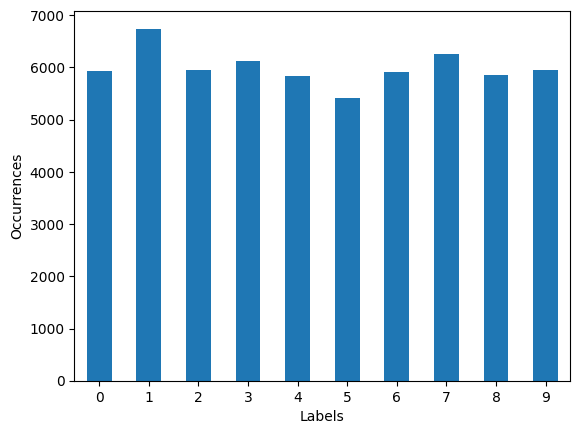

In [38]:
#plotting the series using pandas plot function
label_series.plot(xlabel="Labels", ylabel="Occurrences", kind="bar", rot=0)

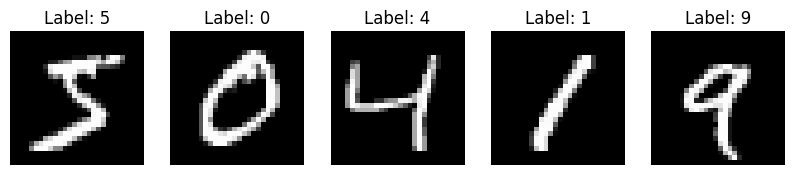

In [39]:
#defining the 5 figures we want to see in a single row
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

for i in range(5):
  image, label = train_dataset[i]
  pic = image.squeeze().numpy()
  axes[i].imshow(pic, cmap='gray')
  axes[i].set_title(f"Label: {label}")
  axes[i].axis('off')
plt.show()

2c) The graph of the distribution of the digits shows us that the distribution of the digits in the data is quite even. This is good because we will not have to worry about providing our model with data that has an uneven distribution of data and hopefully train the model more accurately. 

## Question 3

In [40]:
#imports for CNN model
import torch.nn as nn
import torch.nn.functional as F

In [41]:
#defining the cnn model class
class cnn(nn.Module):
    def __init__(self):
        super().__init__()

        #1st convutional layer
        self.conv1 = nn.Conv2d(1,8,kernel_size=3, stride=1,padding=1)

        #2nd convutional layer
        self.conv2 = nn.Conv2d(8,16,kernel_size=3, stride=1, padding=1)

        #fully connected layer
        self.fc1 = nn.Linear(64,10)

    def forward(self,x):
        #1st convolutional layer with ReLU and max pooling
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)

        #2nd convolutional layer
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,7,7)
        
        #flatten
        x = x.reshape(x.shape[0],-1)

        #fully connected layer
        x = self.fc1(x)
        
        return x

**3c)** The difference between convolution and cross correlation is that convolution reverses the rows and columns of the image filter before completing the multiplication and summation, while cross correlation keeps the filter the same. For example, if the filter was a 3x3 grid, index 1 would be in the top left in cross correlation and increment by one left to right, while in convolution, index 1 would be in the bottom right and increment by one right to left. While they are different, CNN works with both because both methods produce the same or similar outputs, and if they do not, the difference is not significant because the training process allows the model to learn the kernal weights. \
**3d)** Max pooling is a method that finds the maximum element from the regions of the feature map covered by the filter. It slides over a feature map and reviews each section and retrieves the max value from each region to create a new feature map that has a reduced spatial size. Average pooling is a method that finds the average value from the sum of the elements in each individual region of the feature map covered by the filter. It slides over the feature map and reviews each section, sums up the elements in the region and then divides it by the total number of elements in that region to find the average, which it then stores. This also is used to reduce the spatial size of a feature map. The difference between the two is that max pooling provides the most prominent feature in each region of the feature map, while average pooling provides an average of all the features in a feature map. When you want to find something prominent in an image, max pooling is more efficient because it will retrieve the element with the highest intensity of pixels, while average pooling is useful when it is important to maintain an overall context of the image and not just a specific feature. \
**3e)** The difference between the convolutional layer and the fully connected layer is that the convolutional layer is used to learn and extract features using kernals and feature maps, while the fully connected layer is used to classify the features found by the convolutional layer. 

## Question 4

In [42]:
# defining model paramters such as the loss function and optimizer
import torch
import torch.optim as optim

device = torch.device("cpu")
model = cnn().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [43]:
#running the model on training data
from tqdm import tqdm

epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    # adding progress bar
    for images, labels in tqdm(load_train, desc=f'Epoch {epoch+1}/{epochs}'):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        output = model(images)
        loss = criterion(output, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(load_train)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

Epoch 1/5: 100%|██████████| 938/938 [00:16<00:00, 55.81it/s]


Epoch [1/5], Loss: 0.5481


Epoch 2/5: 100%|██████████| 938/938 [00:16<00:00, 56.19it/s]


Epoch [2/5], Loss: 0.1501


Epoch 3/5: 100%|██████████| 938/938 [00:16<00:00, 56.02it/s]


Epoch [3/5], Loss: 0.1132


Epoch 4/5: 100%|██████████| 938/938 [00:16<00:00, 56.13it/s]


Epoch [4/5], Loss: 0.0950


Epoch 5/5: 100%|██████████| 938/938 [00:16<00:00, 56.25it/s]

Epoch [5/5], Loss: 0.0840


**4b)** The purpose of running multiple epochs is to ensure the model has enough time to be trained on the data and allow the model to refine its parameters to improve its learning. Each time we run an epoch, the model processes the entire set of data, so by running it more than once, it will better learn the data and in theory have a higher accuracy. If we ran too few epochs, then the model might not be as accurate compared to if we ran it with more. However, it is important we do not run too much epochs because then it will take a lot longer to train the model and it is also more computationally expensive so it will require a more powerful computer. \
**4c)** The forward pass is the passing of information from one node to the next. It takes the input, x, and feeds it to the first layer of n nodes, applies an activation function and any weights and biases to each node in the first layer. Then it proceeds to take the output of each node and feed them to the next layer of n nodes and again applies an activation and any weights and biases. It repeats this until it reaches an output that takes in the previous layer's n nodes as input before finally calculating the loss which essentially tells us the accuracy of the model. A backward pass is the process of walking backward through the neural network to calculate how changes in the loss function's parameters can impact the loss value. This method begins at the output node, and walks backward through the network and takes the derivative of the output with respect to each of the nodes' weights and biases. It performs these calculations on each of these nodes until it reaches the input node where it generates a gradient of all the weights and biases so the model can update itself. The difference between these two processes is that the forward pass calculates how many errors a model made in an iteration, while a backward pass determines how the weights and biases can be adjusted to make the model more accurate and decrease loss.    
**4d)** The loss.backward() function calculates the derivative of the output with respect to each node's weights and biases and actually performs the backward propogation of the model, while optimizer.step() aims to optimize the model's parameters in order to minimize the loss function.  

## Question 5

In [44]:
# calculating the accuracy of the model using max pooling 
def calculate_accuracy(model, data_loader, device):
    # Set to evaluation mode
    model.eval()

    # Initialize counters
    correct = 0
    total = 0

    with torch.no_grad():
        # Iterate through all batches
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            # torch.max will return (max, max index). We are getting the predicted index.
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Get percent accuracy
    return 100*correct/total

calculate_accuracy(model, load_test, device)

97.54

In [45]:
#modifying model to use average pooling
#defining the cnn model class
class cnn(nn.Module):
    def __init__(self):
        super().__init__()

        #1st convutional layer
        self.conv1 = nn.Conv2d(1,8,kernel_size=3, stride=1,padding=1)

        #2nd convutional layer
        self.conv2 = nn.Conv2d(8,16,kernel_size=3, stride=1, padding=1)

        #fully connected layer
        self.fc1 = nn.Linear(64,10)

    def forward(self,x):
        #1st convolutional layer with ReLU and max pooling
        x = F.relu(self.conv1(x))
        x = F.avg_pool2d(x,2,2)

        #2nd convolutional layer
        x = F.relu(self.conv2(x))
        x = F.avg_pool2d(x,7,7)
        
        #flatten
        x = x.reshape(x.shape[0],-1)

        #fully connected layer
        x = self.fc1(x)
        
        return x

In [46]:
#defining parameters for updated model
import torch
import torch.optim as optim

device = torch.device("cpu")
model = cnn().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
#running the model on training data
from tqdm import tqdm

epochs = 5

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    # adding progress bar
    for images, labels in tqdm(load_train, desc=f'Epoch {epoch+1}/{epochs}'):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        output = model(images)
        loss = criterion(output, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(load_train)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

Epoch 1/5: 100%|██████████| 938/938 [00:17<00:00, 54.76it/s]


Epoch [1/5], Loss: 1.1385


Epoch 2/5: 100%|██████████| 938/938 [00:16<00:00, 55.96it/s]


Epoch [2/5], Loss: 0.3862


Epoch 3/5: 100%|██████████| 938/938 [00:16<00:00, 55.90it/s]


Epoch [3/5], Loss: 0.2888


Epoch 4/5: 100%|██████████| 938/938 [00:16<00:00, 56.00it/s]


Epoch [4/5], Loss: 0.2497


Epoch 5/5: 100%|██████████| 938/938 [00:16<00:00, 55.86it/s]

Epoch [5/5], Loss: 0.2259


In [48]:
# calculating the accuracy of the model using max pooling 
def calculate_accuracy(model, data_loader, device):
    # Set to evaluation mode
    model.eval()

    # Initialize counters
    correct = 0
    total = 0

    with torch.no_grad():
        # Iterate through all batches
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            # torch.max will return (max, max index). We are getting the predicted index.
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Get percent accuracy
    return 100*correct/total

calculate_accuracy(model, load_test, device)

94.24

Markdown notes and full English sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
